# 2. 데이터 다루기

- 지도 학습 : 입력과 타깃이 존재, 이 두 데이터로 훈련을 진행함.
- 비지도 학습 : 입력데이터만 존재한다.

In [25]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
print(len(fish_length))
print(len(fish_weight))

49
49


물고기 49마리의 길이, 무게가 저장된 데이터이다. 이 데이터는 모델을 훈련시킬 때만 사용한다.

이제 이 데이터를 각 생선의 길이와 무게를 하나의 리스트로 담은 2차원 리스트로 만든다.

In [26]:
fish_data = [[l,w] for l,w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


fish_data는 49마리의 생선 정보가 담긴 데이터이고, fish_target은 각각의 데이터가 어떤 생선을 가리키는지 나타내는 정보이다.  
1은 도미, 0은 빙어

입력데이터와 타깃을 만들 때 위와 같이 해도 되지만,  
넘파이에서는 여러가지 편리한 함수를 제공한다.  
또한, 훈련데이터처럼 많은 수의 리스트를 다룰 때는 넘파이 배열로 데이터를 다루는 것이 파이썬 내장 리스트로 담는 것보다 효율적이다.  

In [27]:
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.array(fish_target)
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


np.column_stack 함수는 리스트를 세로로 세운 뒤 합치는 함수이고(따라서, 리스트의 길이가 같아야 한다.),  
np.concatenate 함수는 리스트를 가로로 세운 뒤 함치는 함수이다.(길이 달라도 된다.)

이 예시에서 모델을 훈련시킬때는 사이킷런 패키지의 K-최근접 이웃 알고리즘을 사용한다.  
이 알고리즘은 예측과 분류 문제에서 사용할 수 있다.  
예측 문제에서 사용할 경우, 예측하고자 하는 데이터와 가장 가까운 데이터들의 평균으로 예측하고,  
분류 문제에서 사용할 경우, 분류하고자 하는 데이터와 가장 가까운 데이터중에서 가장 많은 레이블로 분류한다.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

##kn49 = KNeighborsClassifier(n_neighbors=49)
##이 코드는 가장 가까운 49개의 이웃을 검사하게 한다. 기본값은 5이다.

모델을 훈련시킬 때는 훈련데이터와 테스트 데이터를 분리해야 한다.  
훈련데이터로 테스트를 진행하면 답지를 이미 보고 시험을 치는 것과 같다. 그렇게 본 시험의 점수는 절대 믿을 수 없다.

사이킷런에서는 훈련데이터와 테스트 데이터로 나누는 함수를 제공한다.

In [42]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42, stratify=fish_target)

train_test_split()함수를 사용하면 데이터를 훈련데이터와 테스트 데이터로 나눌 수 있다.  
random_state는 데이터를 무작위로 섞기 위해 설정하는 랜덤 시드 값이다.  
stratify는 클래스 비율에 맞게 데이터를 나눠준다.

In [43]:
print(train_input.shape)
print(train_target.shape)

(36, 2)
(36,)


훈련데이터와 테스트데이터를 시각화하면 다음과 같다.

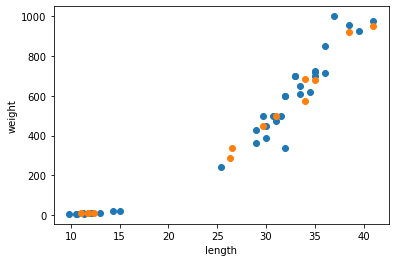

In [44]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

kn.fit()함수를 사용하면 모델을 훈련시킬 수 있다.  
kn.score()함수를 사용하면 테스트데이터로 모델을 평가할 수 있다.

In [49]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

### 데이터 전처리하기

길이가 25이고, 무게가 150인 생선이 있다. 이 생선을 예측해보자. (물론, 우리는 이 생선이 도미(레이블 : 1)라는 것을 알고 있다.)

In [51]:
print(kn.predict([[25,150]]))

[0]


하지만 우리가 훈련시킨 모델은 이 생선은 빙어(레이블 : 0)라고 예측한다. 무엇이 잘못되었을까??

새로운 생선 데이터를 한번 시각화 해보자.

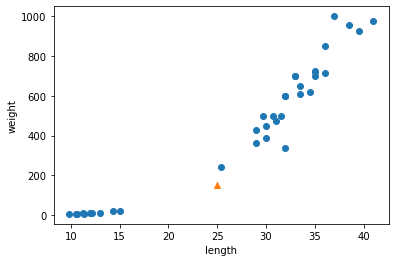

In [52]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이 데이터는 분명 빙어데이터들보다, 도미 데이터들이 더 가까워보인다. 무엇이 잘못되었을까?

그 이유는 범위의 차이에 있다. 무게(weight)는 범위가 0-1000이고, 길이(length)는 범위가 10-40이다.  
그래프 상에서는 가까워 보일지 몰라도 실제 길이는 아닐 수도 있다.  
그렇기 때문에 우리는 모든 특성의 범위를 비슷하게 맞춰주는 작업인 **데이터 전처리** 작업을 해야 한다.

가장 많이 사용하는 방법은 **표준점수**이다.  
계산하는 방법은 평균을 빼고 표준편차로 나누어주면 된다. 넘파이에서는 두 함수를 모두 제공한다.

In [56]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [57]:
train_input = (train_input-mean)/std

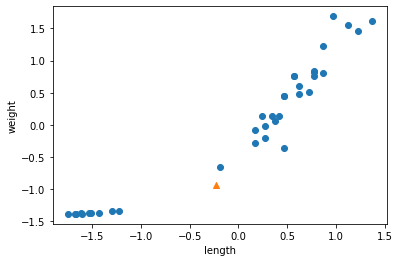

In [58]:
import matplotlib.pyplot as plt
new = ([25,150]-mean)/std
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(new[0],new[1], marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

데이터 전처리가 완료되었다. 이제 모델을 다시 훈련해보자.

In [59]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

테스트 데이터 역시 같은 방법으로 전처리를 해주어야 한다.

In [60]:
test_input = (test_input - mean)/std

In [61]:
kn.score(test_input, test_target)

1.0

In [62]:
print(kn.predict([new]))

[1]
